In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    closed = df.recovered+df.deaths
    hospitalized = df.confirmed - closed
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(closed,dashes=[2,2,6, 2],c='y',label='closed')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('closed: ',closed.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/closed.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('closed')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)


     date  confirmed  deaths  recovered
 2020-5-2       2966      54       2732
new  confirmed
       6.0


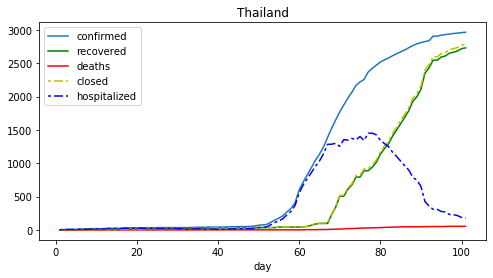

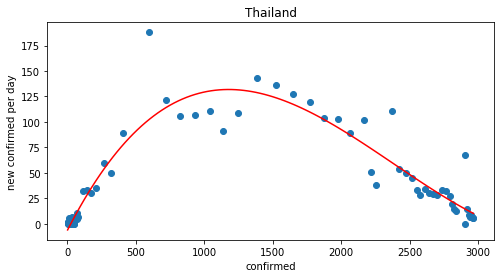

closed:  2786
deaths:  54
%:  1.938262742282843


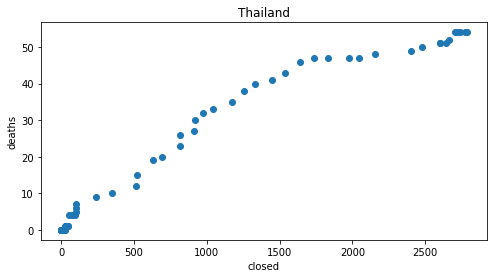

     date  confirmed  deaths  recovered
 2020-5-2     124054    1222      15013
new  confirmed
    9623.0


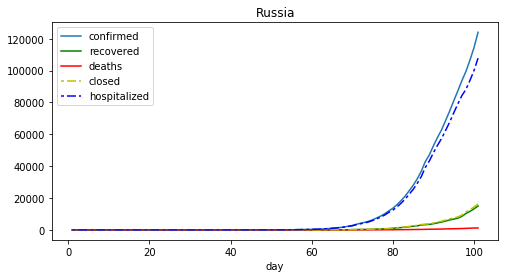

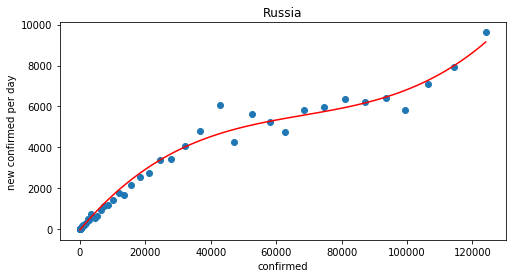

closed:  16235
deaths:  1222
%:  7.526947951955651


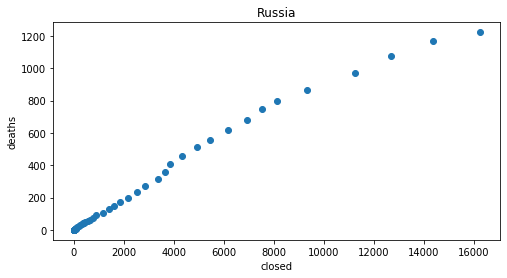

     date  confirmed  deaths  recovered
 2020-5-2      22088    2061      12377
new  confirmed
    1349.0


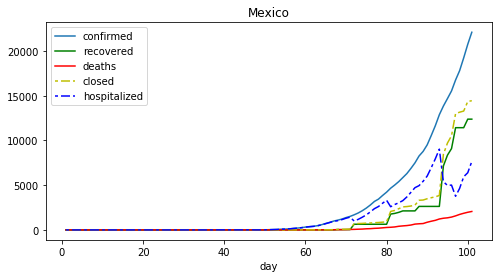

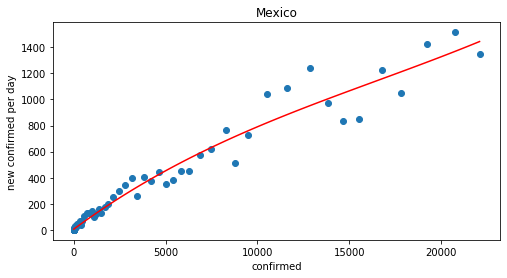

closed:  14438
deaths:  2061
%:  14.274830308907053


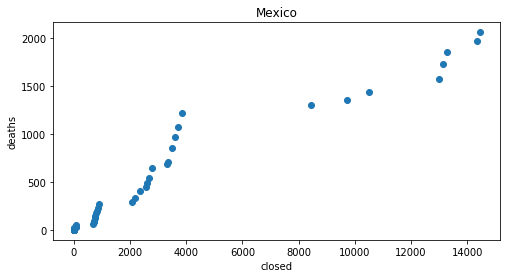

     date  confirmed  deaths  recovered
 2020-5-2      97100    6761      40937
new  confirmed
    4898.0


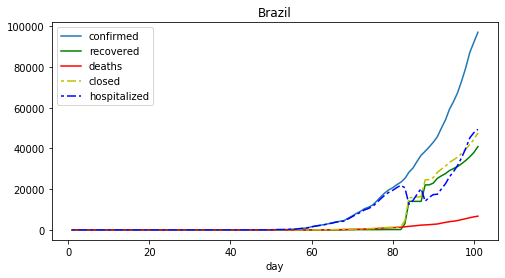

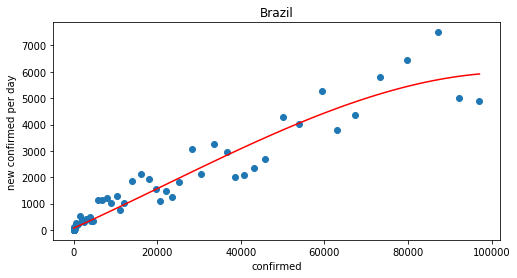

closed:  47698
deaths:  6761
%:  14.174598515661033


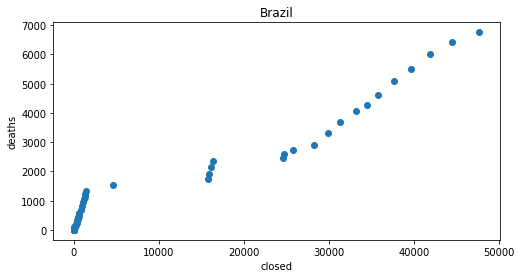

     date  confirmed  deaths  recovered
 2020-5-2       6176     103       4326
new  confirmed
     105.0


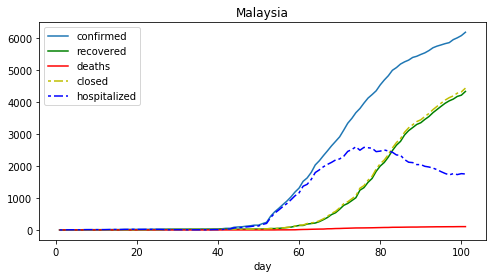

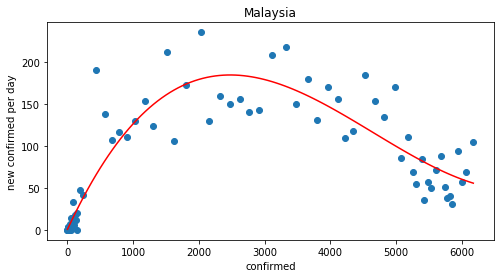

closed:  4429
deaths:  103
%:  2.3255813953488373


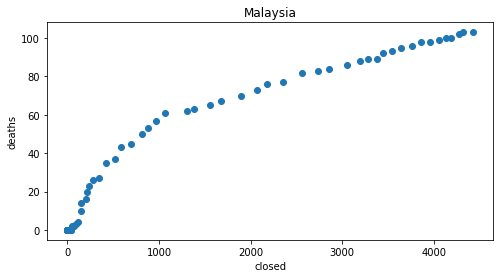

     date  confirmed  deaths  recovered
 2020-5-2      17548      17       1347
new  confirmed
     447.0


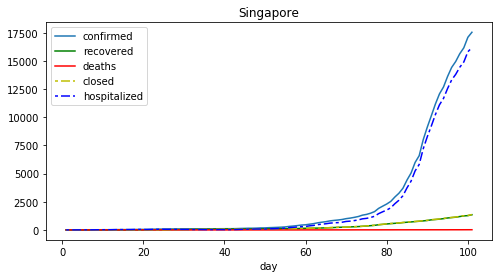

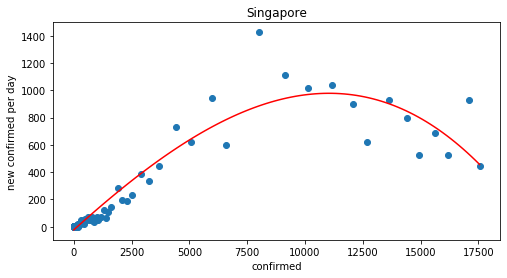

closed:  1364
deaths:  17
%:  1.2463343108504399


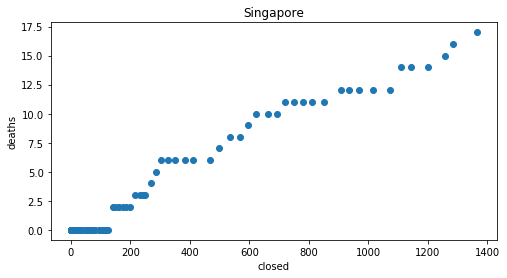

     date  confirmed  deaths  recovered
 2020-5-2      10843     831       1665
new  confirmed
     292.0


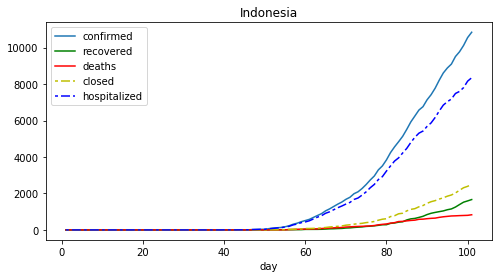

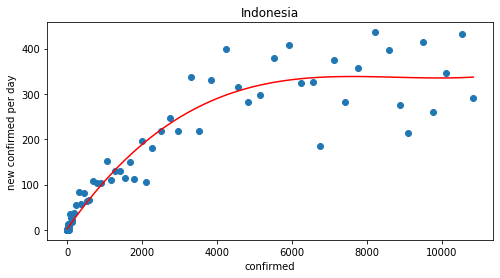

closed:  2496
deaths:  831
%:  33.293269230769226


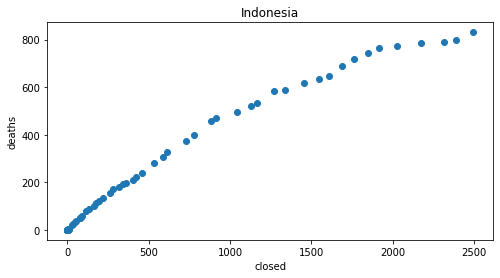

     date  confirmed  deaths  recovered
 2020-5-2    1132539   66369     175382
new  confirmed
   29078.0


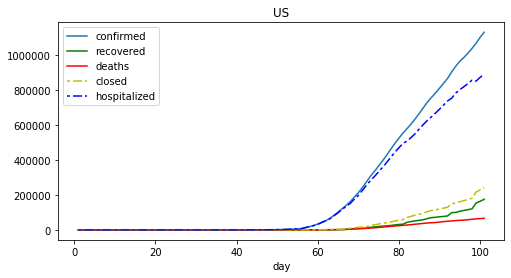

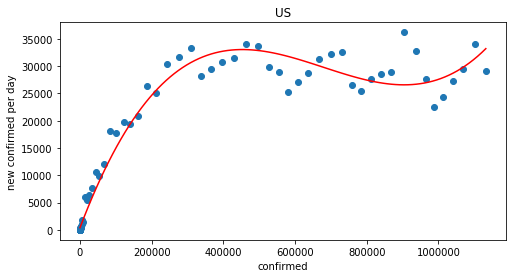

closed:  241751
deaths:  66369
%:  27.453454173922754


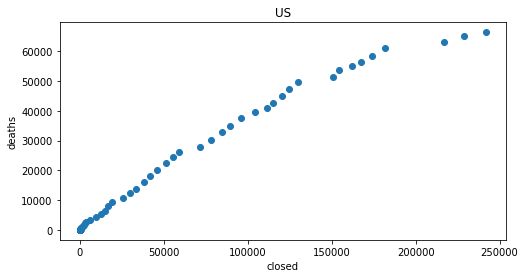

     date  confirmed  deaths  recovered
 2020-5-2      83959    4637      78586
new  confirmed
       0.0


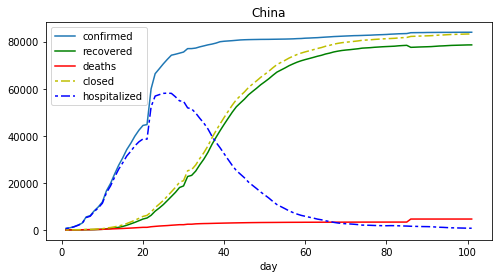

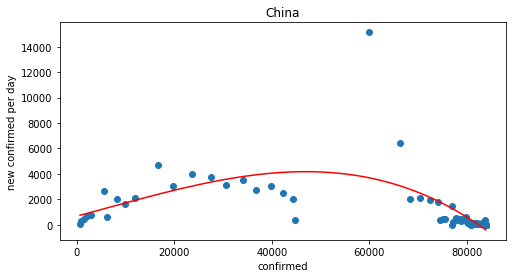

closed:  83223
deaths:  4637
%:  5.571777032791416


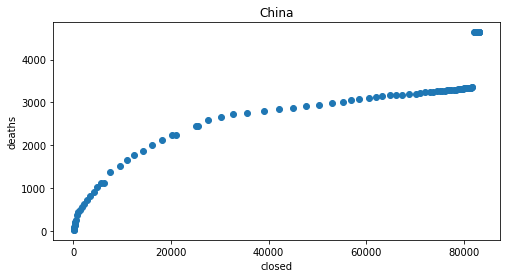

     date  confirmed  deaths  recovered
 2020-5-2      10793     250       9183
new  confirmed
      13.0


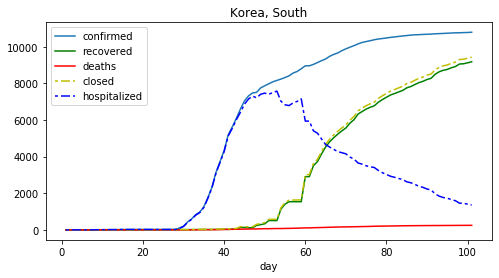

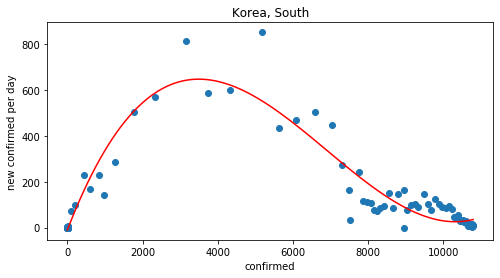

closed:  9433
deaths:  250
%:  2.6502703275734127


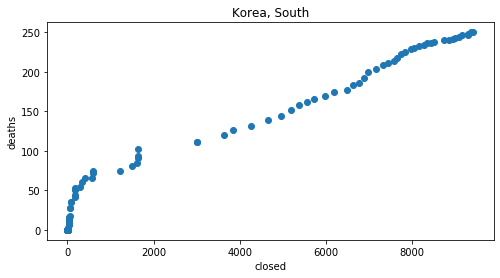

     date  confirmed  deaths  recovered
 2020-5-2     209328   28710      79914
new  confirmed
    1900.0


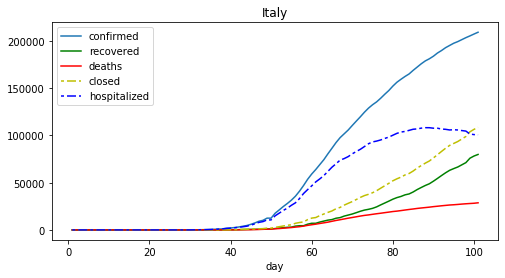

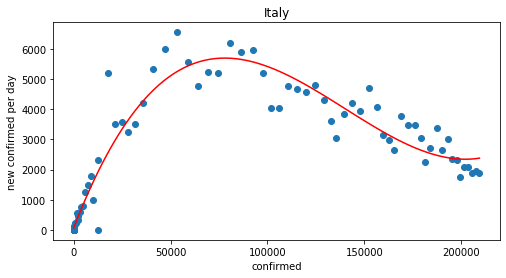

closed:  108624
deaths:  28710
%:  26.430623066725584


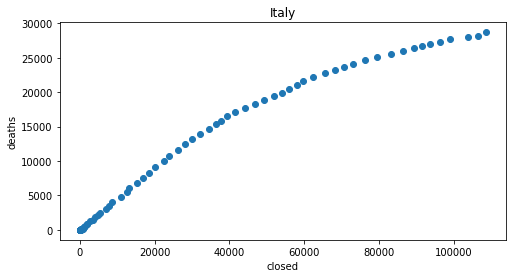

     date  confirmed  deaths  recovered
 2020-5-2     216582   25100     117248
new  confirmed
    3147.0


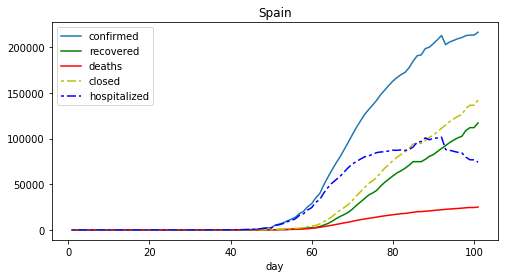

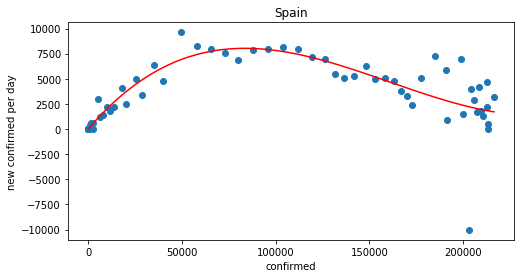

closed:  142348
deaths:  25100
%:  17.632843454070308


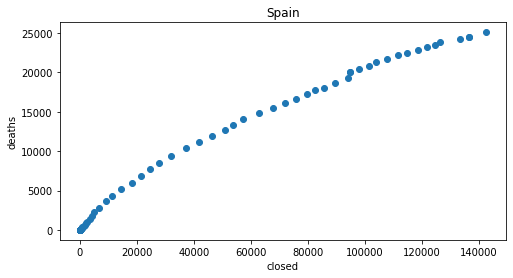

In [4]:
for c in ['Thailand','Russia','Mexico','Brazil','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
